#  Chemical Langevin equation

$$
X_i(t+\tau) = X_i(t) + \sum_{j=1}^M \nu_{ji} \left[ a_j(x_t)\tau + \left( a_j(x_t)\tau \right)^{1/2} \mathcal{N}(0,1) \right]
$$

In [1]:
import sys
sys.path.append("../..")

In [2]:
# Numpy is used to set the timespan of the Model.
import numpy

# Import the types that'll be needed to define your Model.
from gillespy2.core import (
    Model,
    Species,
    Reaction,
    Parameter
)

In [4]:
from gillespy2 import SSACSolver
from gillespy2 import ODECSolver
from gillespy2 import CLESolver
from matplotlib import pyplot as plt

In [5]:
class MichaelisMenten(Model):
     def __init__(self, scaling=1):

            # Intialize the Model with a name of your choosing.
            Model.__init__(self, name="Michaelis_Menten")
            
            """
            Parameters are constant values relevant to the system, such as reaction kinetic rates.
            
            - name: A user defined name for reference.
            - expression: Some constant value.
            """

            rate1 = Parameter(name="rate1", expression=0.0017)
            rate2 = Parameter(name="rate2", expression=0.5)
            rate3 = Parameter(name="rate3", expression=0.1)
            
            # Add the Parameters to the Model.
            self.add_parameter([rate1, rate2, rate3])
            
            """
            Species can be anything that participates in or is produced by a reaction channel.
            
            - name: A user defined name for the species.
            - initial_value: A value/population count of species at start of simulation.
            """

            A = Species(name="A", initial_value=301*scaling)
            B = Species(name="B", initial_value=120*scaling)
            C = Species(name="C", initial_value=0)
            D = Species(name="D", initial_value=0)
            
            # Add the Species to the Model.
            self.add_species([A, B, C, D])
            
            """
            Reactions are the reaction channels which cause the system to change over time.
            
            - name: A user defined name for the reaction.
            - reactants: A dictionary with participant reactants as keys, and consumed per reaction as value.
            - products: A dictionary with reaction products as keys, and number formed per reaction as value.
            - rate: A parameter rate constant to be applied to the propensity of this reaction firing.
            - propensity_function: Can be used instead of rate in order to declare a custom propensity function in string format.
            """

            r1 = Reaction(
                    name="r1",
                    reactants={A: 1, B: 1}, 
                    products={C: 1},
                    rate=rate1
                )
            
            r2 = Reaction(
                    name="r2",
                    reactants={C: 1}, 
                    products={A: 1, B: 1},
                    rate=rate2
                )
            
            r3 = Reaction(
                    name="r3",
                    reactants={C: 1}, 
                    products={B: 1, D: 1},
                    rate=rate3
                )
            
            # Add the Reactions to the Model.
            self.add_reaction([r1, r2, r3])
            
            # Use NumPy to set the timespan of the Model.
            self.timespan(numpy.linspace(0, 100, 101))

In [6]:
model = MichaelisMenten()

In [7]:
%time result = model.run(solver=SSACSolver)

CPU times: user 15.2 ms, sys: 12 ms, total: 27.1 ms
Wall time: 2.85 s


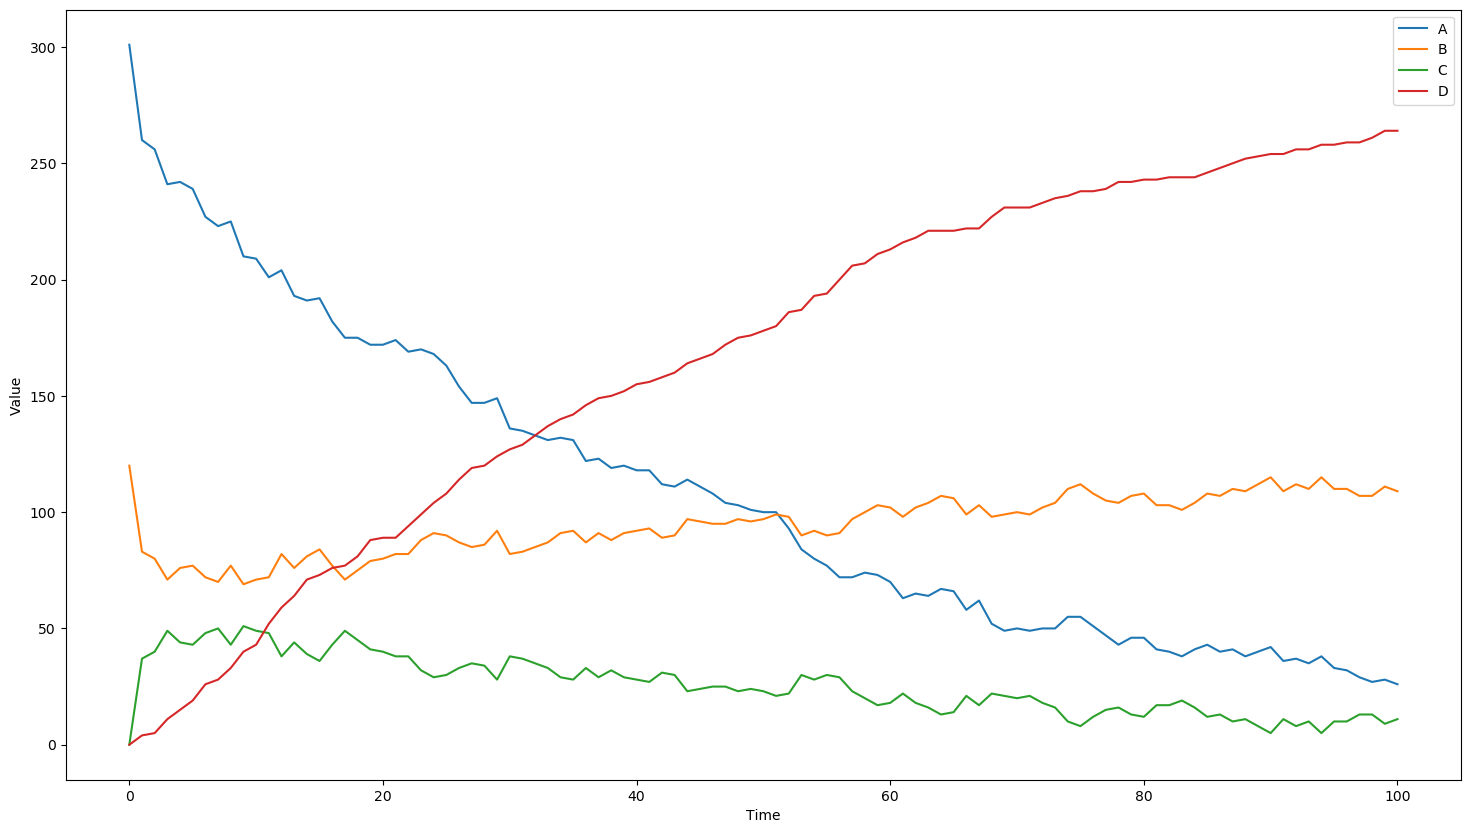

In [8]:
result.plot()

In [9]:
model2 = MichaelisMenten(2)

In [10]:
%time result2 = model2.run(solver=SSACSolver)

CPU times: user 7.34 ms, sys: 3.95 ms, total: 11.3 ms
Wall time: 2.66 s


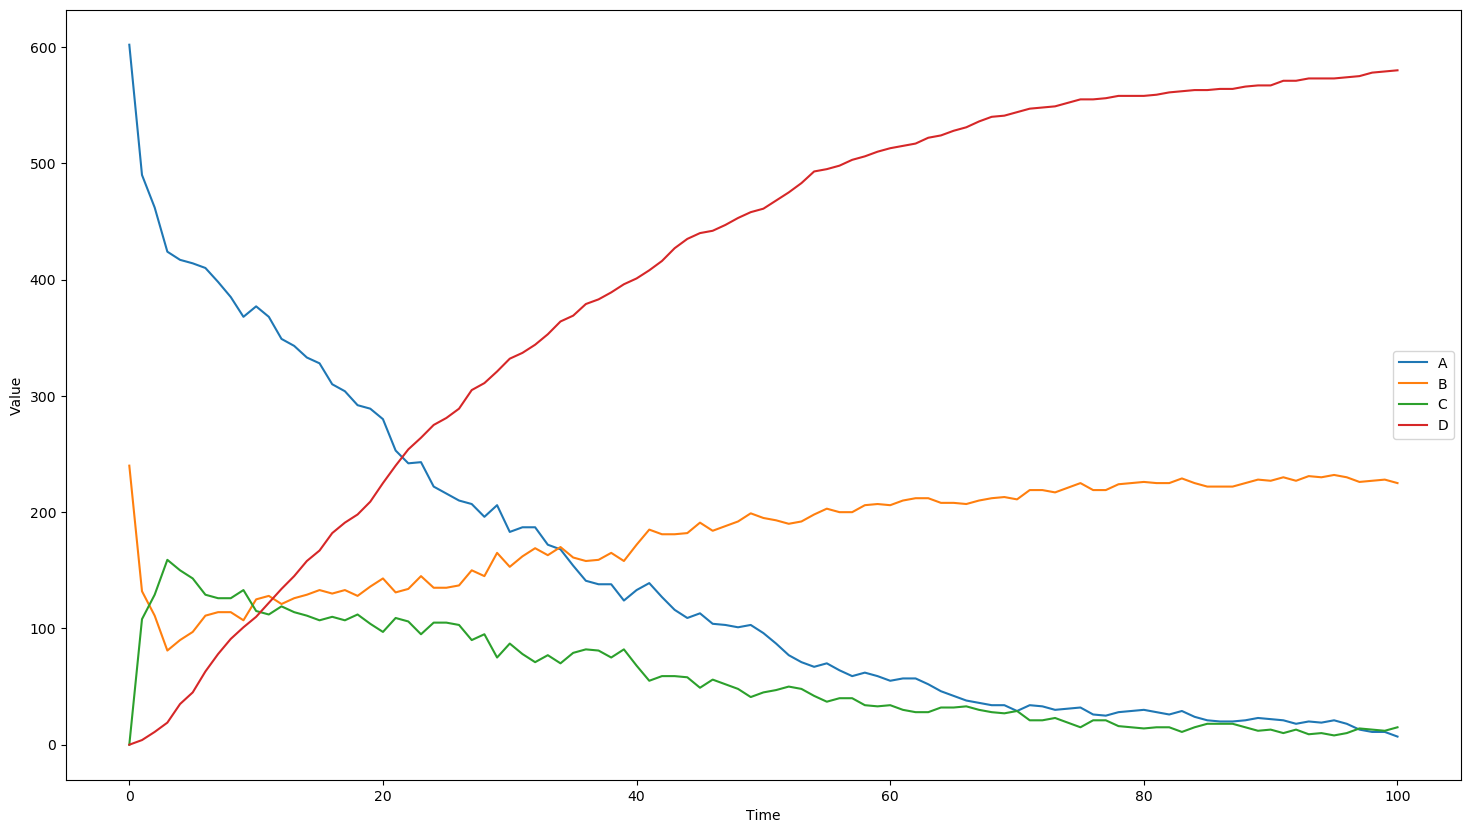

In [11]:
result2.plot()

CPU times: user 3.91 ms, sys: 8.09 ms, total: 12 ms
Wall time: 2.66 s


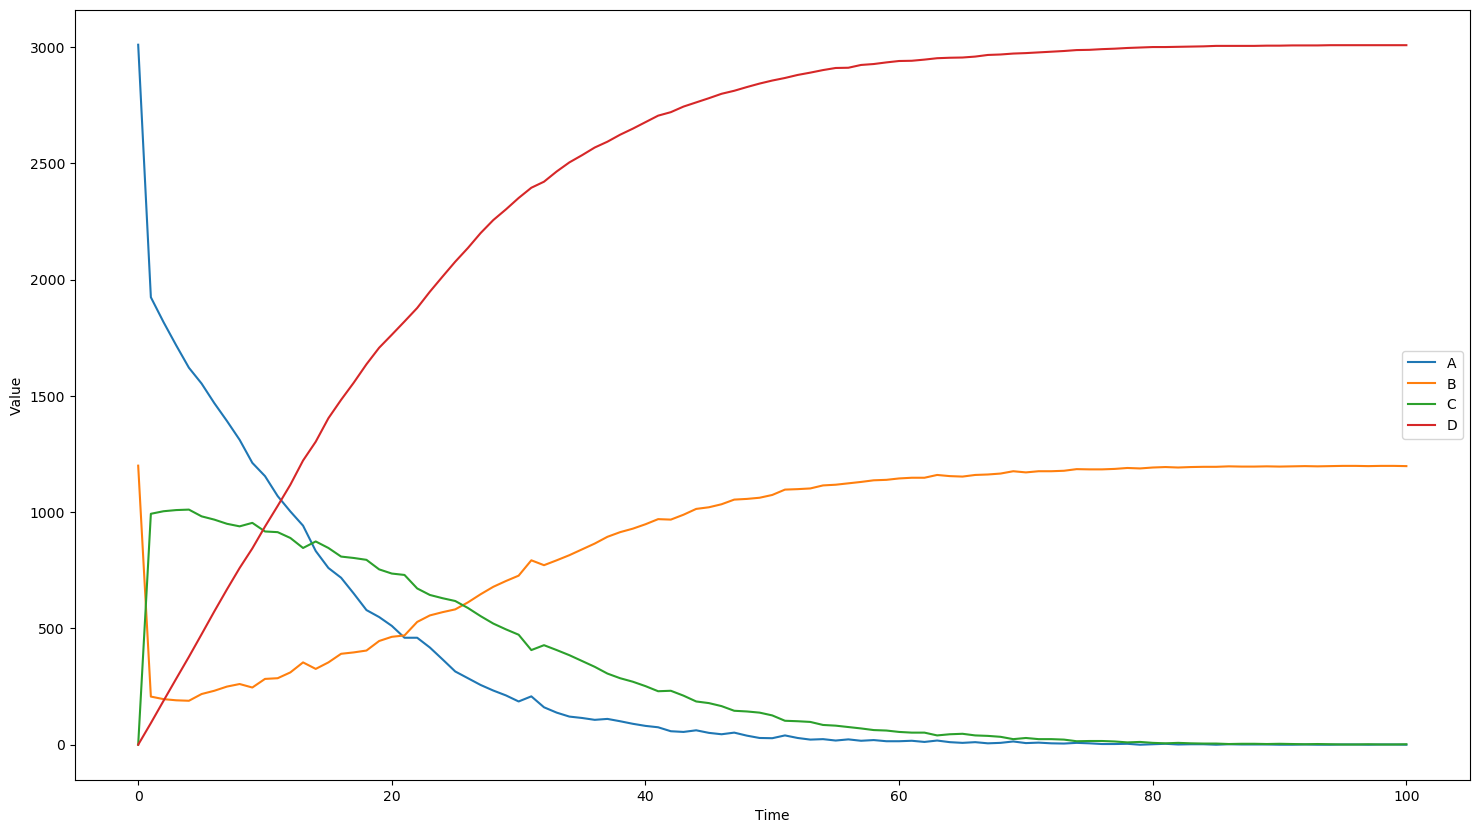

In [12]:
model10 = MichaelisMenten(10)
%time result10 = model10.run(solver=SSACSolver)
result10.plot()

CPU times: user 4.83 ms, sys: 8.65 ms, total: 13.5 ms
Wall time: 2.62 s


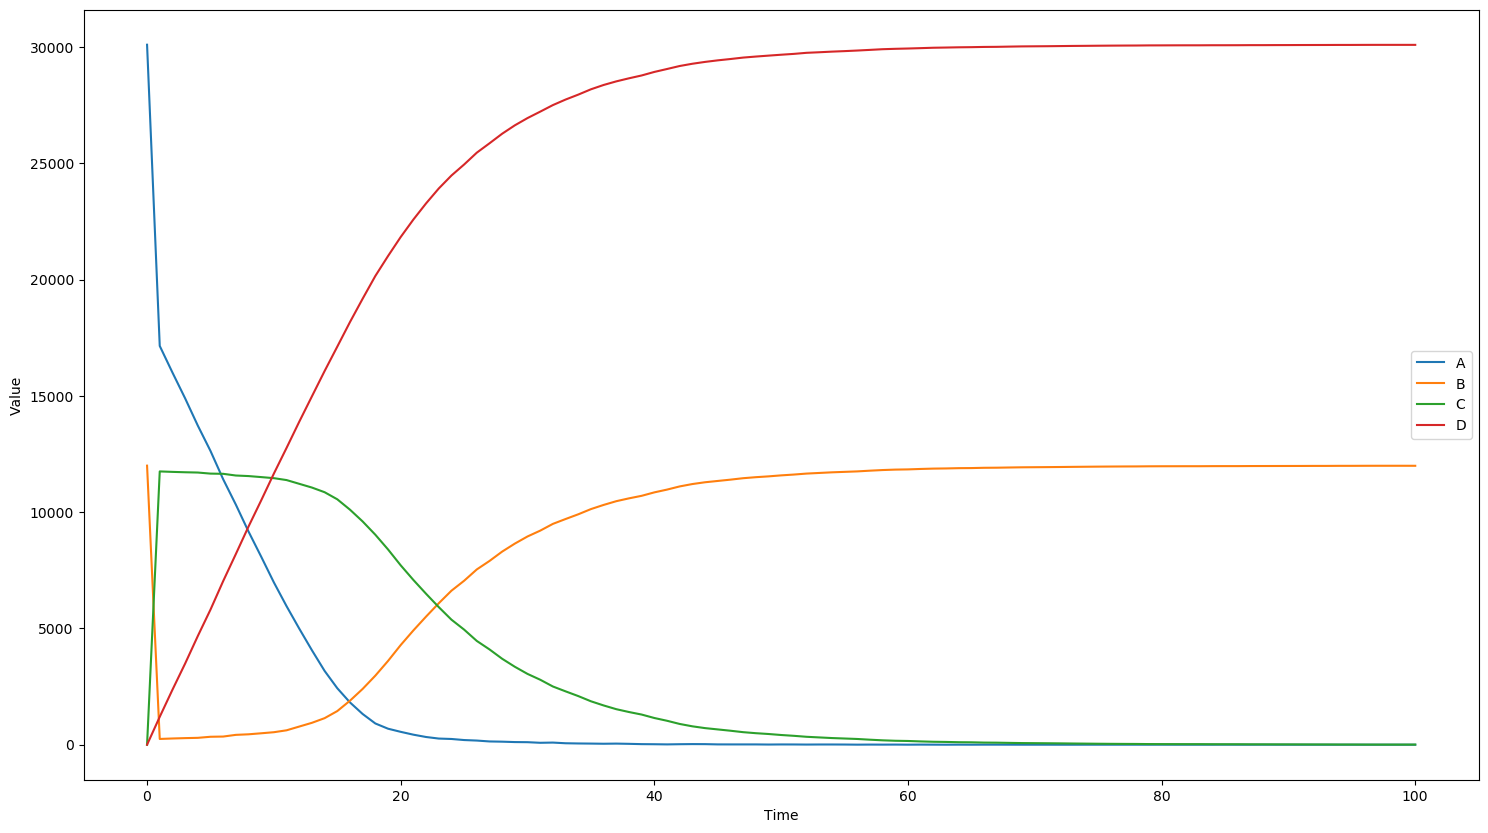

In [13]:
model100 = MichaelisMenten(100)
%time result100 = model100.run(solver=SSACSolver)
result100.plot()

CPU times: user 7.15 ms, sys: 8.44 ms, total: 15.6 ms
Wall time: 5.91 s


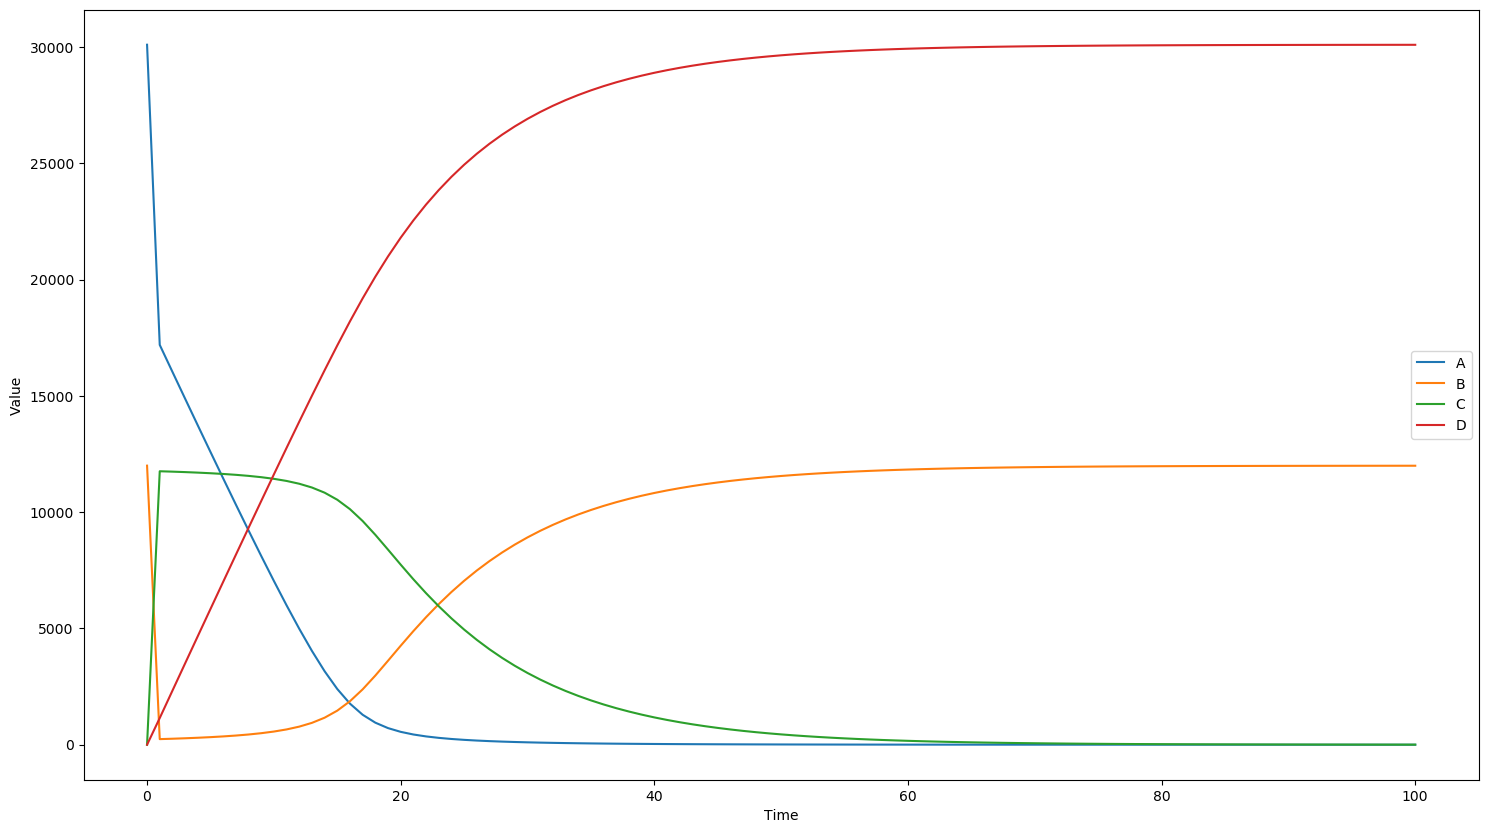

In [14]:
%time dresult100 = model100.run(solver=ODECSolver)
dresult100.plot()

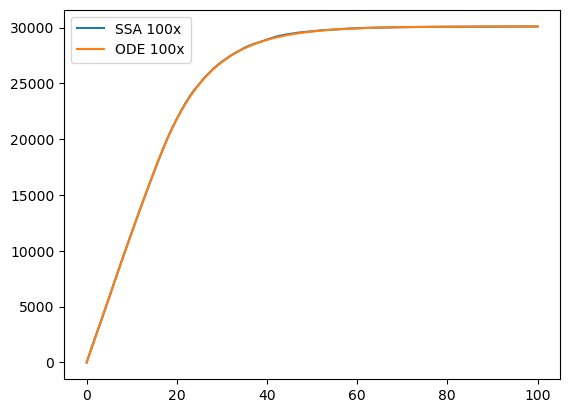

In [15]:
plt.plot(result100['time'],result100['D'],label='SSA 100x')
plt.plot(dresult100['time'],dresult100['D'],label='ODE 100x')
plt.legend(loc='best')

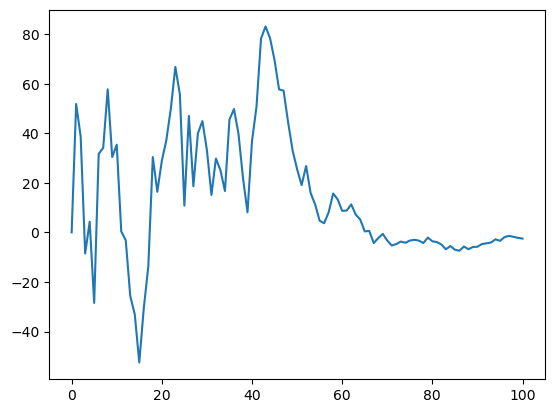

In [17]:
plt.plot(result100['time'],(result100['D']-dresult100['D']))